In [15]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle as pkl
from scipy.stats import randint as sp_randint

In [16]:
train_df = pd.read_csv('X_train2.csv')
# train_df = pd.read_csv('X_train1.csv')

In [17]:
train_df.head()

,id,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,d1mm9tcy42,62.0,2014,1,1,2014,1,1,0,0,...,0.0,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
1,yo8nz8bqcq,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4grx6yxeby,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ncf87guaf0,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4,4rvqpxoh3h,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
train_df.set_index('id',inplace=True)

In [20]:
with open('labels.pkl','rb') as f:
    Y = pkl.load(f)
    print(Y.shape)

(73812,)


In [21]:
# with open('labels1.pkl','rb') as f:
#     Y = pkl.load(f)
#     print(Y.shape)

In [22]:
train_df.head()

,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,gender_FEMALE,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
id,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,62.0,2014,1,1,2014,1,1,0,0,0,...,0.0,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
yo8nz8bqcq,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4grx6yxeby,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ncf87guaf0,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4rvqpxoh3h,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:

x_cfl= RandomForestClassifier()

prams={
     'min_samples_split':[2,20],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,cv= 3,verbose=10,n_jobs=-1,)
random_cfl.fit(train_df,Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  4.7min remaining:   31.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 20], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [24]:
# displaying the best parameters
random_cfl.best_params_

{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 10}

In [27]:
#Using the best parameters to train the model
x_cfl=RandomForestClassifier(n_estimators=500,min_samples_split=2,max_depth=10)
x_cfl.fit(train_df,Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
#storing the model in a pickle file
import pickle 
pickle.dump(x_cfl,open('RF.pickle.dat','wb'))

In [29]:
classifier = pickle.load(open('RF.pickle.dat','rb'))

In [30]:
test_df = pd.read_csv('X_test2.csv')

In [37]:
# test_df.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
test_df.head(15)

,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,gender_FEMALE,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
id,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,35.0,2014,7,1,2014,7,1,0,0,1,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jtl0dijy2j,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx0ulgorjt,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
6c6puo6ix0,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
czqhjk3yfe,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
szx28ujmhf,28.0,2014,7,1,2014,7,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
guenkfjcbq,48.0,2014,7,1,2014,7,1,0,0,0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tkpq0mlugk,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3xtgd5p9dn,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,84.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0


In [40]:
test_df.set_index('id',inplace=True)

In [41]:
test_df.head()

,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,gender_FEMALE,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
id,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,35.0,2014,7,1,2014,7,1,0,0,1,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jtl0dijy2j,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx0ulgorjt,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
6c6puo6ix0,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
czqhjk3yfe,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
# since in the problem statement it is mentioned that the we need to predict the top 5 destinations so we need to predict the probabilistic value of the test data
pred_probab = classifier.predict_proba(test_df)

In [43]:
# storing the predictions of each user_id in a dataframe with user_id as the index
pred_probab_df = pd.DataFrame(pred_probab,index=test_df.index)

In [44]:
pred_probab_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,,
5uwns89zht,0.001502,0.003722,0.002181,0.007116,0.012815,0.006783,0.007760,0.699447,0.002340,0.000660,0.220037,0.035639
jtl0dijy2j,0.000831,0.002190,0.001067,0.003871,0.008386,0.003826,0.005727,0.850855,0.001309,0.000473,0.100638,0.020827
xx0ulgorjt,0.000902,0.003111,0.001440,0.005313,0.011489,0.004990,0.007966,0.824988,0.001542,0.000714,0.112940,0.024605
6c6puo6ix0,0.000877,0.003087,0.001389,0.005552,0.011619,0.004953,0.007641,0.826830,0.001473,0.000722,0.111211,0.024647
czqhjk3yfe,0.001580,0.013982,0.003514,0.019310,0.045565,0.020012,0.037435,0.212242,0.009757,0.006656,0.532219,0.097727


In [45]:
# The dictionary is the label encoding of the countries feature
output_classes = {'AU': 0,
 'CA': 1,
 'DE': 2,
 'ES': 3,
 'FR': 4,
 'GB': 5,
 'IT': 6,
 'NDF': 7,
 'NL': 8,
 'PT': 9,
 'US': 10,
 'other': 11}

In [46]:
# inverting the dictionary
inv_classes = {v:k for k,v in output_classes.items()}

In [47]:
inv_classes

{0: 'AU',
 1: 'CA',
 2: 'DE',
 3: 'ES',
 4: 'FR',
 5: 'GB',
 6: 'IT',
 7: 'NDF',
 8: 'NL',
 9: 'PT',
 10: 'US',
 11: 'other'}

In [48]:
# taking the indices from 0-11
indices = np.arange(0,12)

In [49]:
#prediction values of the first user_id
pred_probab[0]

array([1.50174261e-03, 3.72211676e-03, 2.18083470e-03, 7.11581193e-03,
       1.28147245e-02, 6.78309589e-03, 7.76009020e-03, 6.99446630e-01,
       2.33953031e-03, 6.59914619e-04, 2.20036945e-01, 3.56385638e-02])

In [50]:
# creating a dictionary of the predictio and indices value
pred_dict = dict(zip(indices,pred_probab[0]))

In [51]:
# sorting the dictionary and taking only the top 5 values
sorted_abc = sorted(pred_dict.items(),key=lambda x:x[1],reverse=True)[:5]

In [52]:
sorted_abc

[(7, 0.6994466295747693),
 (10, 0.22003694510947955),
 (11, 0.035638563773071855),
 (4, 0.01281472452314817),
 (6, 0.007760090202513086)]

In [53]:
# taking only the index value of the tuple sorted_abc
row_indices = [x[0] for x in sorted_abc]

In [54]:
row_indices

[7, 10, 11, 4, 6]

In [55]:
# taking the indices and giving the country names 
top_five =[inv_classes[i] for i in row_indices]

In [56]:
top_five

['NDF', 'US', 'other', 'FR', 'IT']

In [57]:
type(top_five)

list

In [58]:
# Combining the above steps into a fuction so that it can be applied to the prediction dataframe
def top_5_countries(s):
    """
    This function takes the probability values of each id, sorts the top 5 values and using an inverse dictionary(inv_classes) gives the top 5 countries prediction.
    """
    indices = np.arange(0,12)
    pred_dict = dict(zip(indices,s))
    sorted_abc = sorted(pred_dict.items(),key=lambda x:x[1],reverse=True)[:5]
    row_indices = [x[0] for x in sorted_abc]
    top_five = [inv_classes[i] for i in row_indices]
    return top_five

In [59]:
# here we apply the above function on each row of the dataframe to get the top 5 prediction.
pred_probab_df['top_five'] = pred_probab_df.apply(top_5_countries,axis=1)

In [60]:
pred_probab_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,top_five
id,,,,,,,,,,,,,
5uwns89zht,0.001502,0.003722,0.002181,0.007116,0.012815,0.006783,0.007760,0.699447,0.002340,0.000660,0.220037,0.035639,"[NDF, US, other, FR, IT]"
jtl0dijy2j,0.000831,0.002190,0.001067,0.003871,0.008386,0.003826,0.005727,0.850855,0.001309,0.000473,0.100638,0.020827,"[NDF, US, other, FR, IT]"
xx0ulgorjt,0.000902,0.003111,0.001440,0.005313,0.011489,0.004990,0.007966,0.824988,0.001542,0.000714,0.112940,0.024605,"[NDF, US, other, FR, IT]"
6c6puo6ix0,0.000877,0.003087,0.001389,0.005552,0.011619,0.004953,0.007641,0.826830,0.001473,0.000722,0.111211,0.024647,"[NDF, US, other, FR, IT]"
czqhjk3yfe,0.001580,0.013982,0.003514,0.019310,0.045565,0.020012,0.037435,0.212242,0.009757,0.006656,0.532219,0.097727,"[US, NDF, other, FR, IT]"


In [61]:
# ungrouping the list values of the top_five column
s = pred_probab_df.apply(lambda x: pd.Series(x['top_five']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'country'

In [62]:

submission = pred_probab_df.drop([i for i in range(0,12)] + ['top_five'],axis=1).join(s)
submission.head()

,country
id,
0010k6l0om,NDF
0010k6l0om,US
0010k6l0om,other
0010k6l0om,FR
0010k6l0om,IT


In [63]:
submission.to_csv('RFsubmission.csv')

## The final Public Score(ndcg)

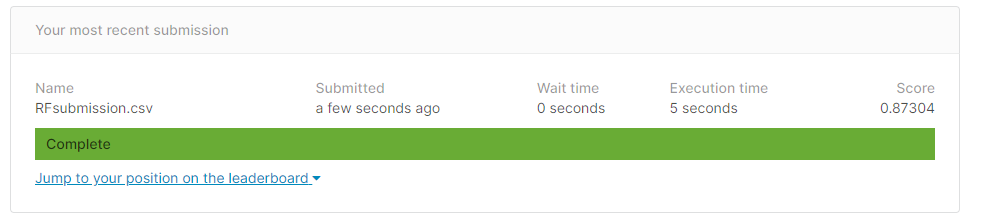

## The final public and private score

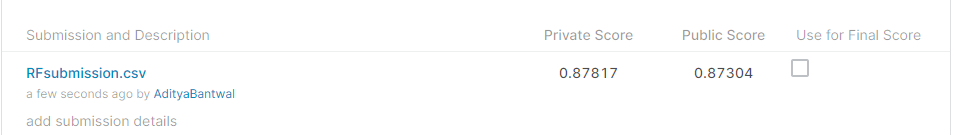

## Conclusion

#### The official Kaggle score is 0.87304 for a Random Forest model which can be further improved by using some text features from the train and session data and doing more hyper parameter tuning. I would like to conclude this notebook here.

## Thank You!